In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
from sklearn import datasets
%matplotlib inline

In [48]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import folium

In Geopandas, we load data into geoDataFrames, which behave the same as pandas DataFrames but they have a column containing geometry (typically, but not always, named 'geometry')

In [4]:
GEOJSON_PATH = os.path.join('cb_2016_41_tract_500k.geojson')
oregon_geojson = gpd.read_file(GEOJSON_PATH)

In [6]:
from geopy.geocoders import Nominatim

In [7]:
# Determining the point (lat, long) representing Oregon
geolocator = Nominatim()
location = geolocator.geocode("Oregon, USA")
oregon_loc = Point(location.longitude, location.latitude)
print(oregon_loc)

POINT (-120.737257 43.9792797)


In [9]:
oregon_pt = Point(-120.737257, 43.9792797)

In [11]:
type(oregon_geojson)

geopandas.geodataframe.GeoDataFrame

In [17]:
CSV_PATH = os.path.join('ACS_16_5YR_DP04_with_ann.csv')
oregon_df = pd.read_csv(CSV_PATH, header=1)

In [19]:
oregon_df['Id2'] = oregon_df['Id2'].astype(str)

In [33]:
oregon_merge = oregon_geojson.merge(oregon_df, left_on=['AFFGEOID', 'GEOID'], right_on=['Id', 'Id2'])

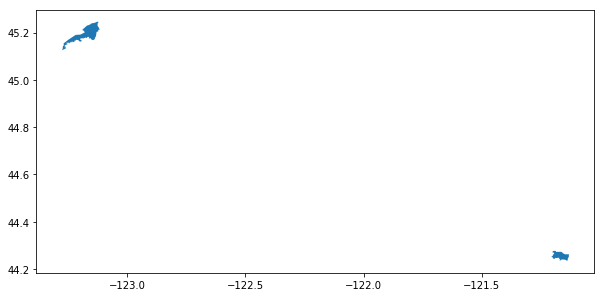

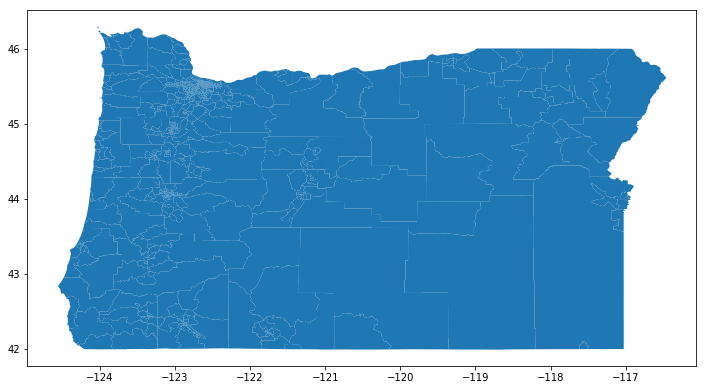

In [56]:
oregon_merge.plot(figsize=(10,7))
oregon_geojson.plot(alpha=1, linewidth=5, figsize=(12,10))

In [81]:
m = folium.Map([-120.737257, 43.9792797], zoom_start=12, tiles="OpenStreetMap")
m.choropleth(geo_data=oregon_geojson.to_json(), 
             data=oregon_geojson,
             columns=['GEOID', 'AWATER'],
             key_on='feature.properties.GEOID', 
             fill_color='BuGn', 
             fill_opacity=0.7,
             highlight=True)

In [82]:
m

In [68]:
oregon_geojson.head()

STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID  NAME LSAD  \
0      41      001  950100  1400000US41001950100  41001950100  9501   CT   
1      41      001  950600  1400000US41001950600  41001950600  9506   CT   
2      41      003  000900  1400000US41003000900  41003000900     9   CT   
3      41      003  010300  1400000US41003010300  41003010300   103   CT   
4      41      005  020800  1400000US41005020800  41005020800   208   CT   

        ALAND    AWATER                                           geometry  
0  2871065097  14489031  POLYGON ((-118.244662 44.958396, -118.245136 4...  
1  2796734200  30628721  POLYGON ((-117.777504 44.992161, -117.747664 4...  
2     9590455         0  POLYGON ((-123.335775 44.595591, -123.319941 4...  
3   627552469    864231  POLYGON ((-123.720065 44.432329, -123.720071 4...  
4     3982134    309866  POLYGON ((-122.660979 45.457819, -122.656972 4...

In [74]:
type(oregon_geojson['AWATER'][1])

numpy.int64

In [84]:
# for col_name in oregon_merge.columns:
#     print(col_name)

In [77]:
tmp_json = oregon_geojson.to_json()

AttributeError: 'str' object has no attribute 'features'

In [22]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
country_shapes = world[['geometry', 'iso_a3']]
country_names = world[['name', 'iso_a3']]

In [28]:
display(type(country_shapes))
display(type(world))

geopandas.geodataframe.GeoDataFrame

geopandas.geodataframe.GeoDataFrame

In [23]:
country_shapes = country_shapes.merge(country_names, on='iso_a3')

In [24]:
country_shapes.head()

geometry iso_a3  \
0  POLYGON ((61.21081709172574 35.65007233330923,...    AFG   
1  (POLYGON ((16.32652835456705 -5.87747039146621...    AGO   
2  POLYGON ((20.59024743010491 41.85540416113361,...    ALB   
3  POLYGON ((51.57951867046327 24.24549713795111,...    ARE   
4  (POLYGON ((-65.50000000000003 -55.199999999999...    ARG   

                   name  
0           Afghanistan  
1                Angola  
2               Albania  
3  United Arab Emirates  
4             Argentina